# NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 50)

In [2]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

# NLTK import etmek yeterli ancak bazen bu uygulamalar gelmiyor bu yüzden tekrar download ettik...

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


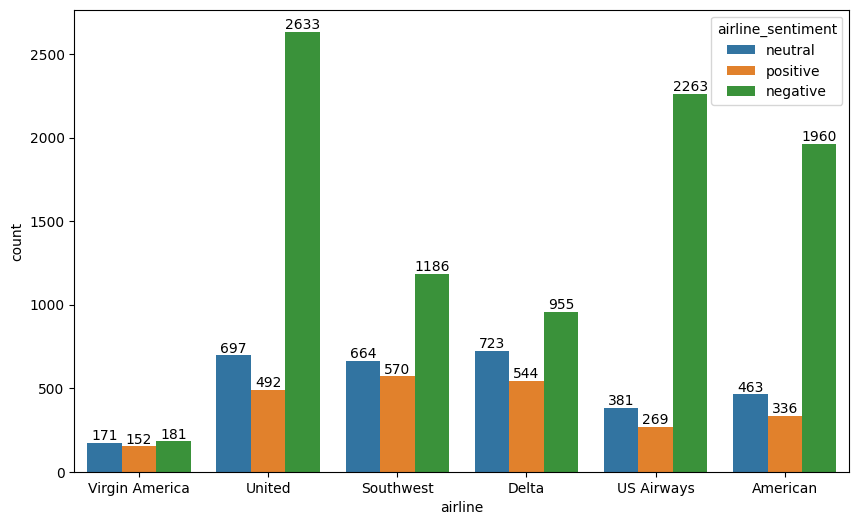

In [4]:
ax = sns.countplot(data = df, x = "airline", hue = "airline_sentiment")
for p in ax.containers:
    ax.bar_label(p)

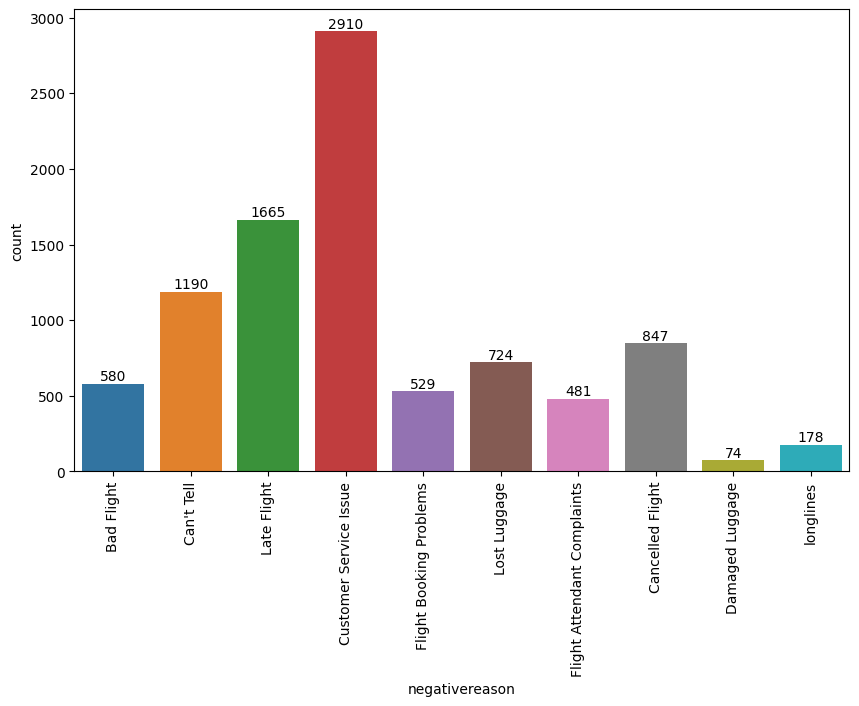

In [5]:
ax = sns.countplot(data=df, x="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

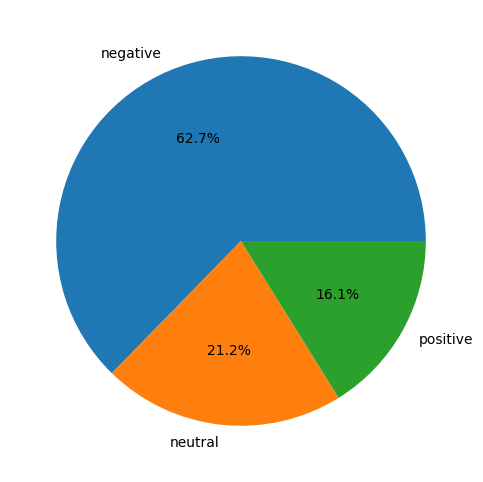

In [6]:
plt.pie(df["airline_sentiment"].value_counts(), 
        labels=df["airline_sentiment"].value_counts().index,
        autopct="%.1f%%")
plt.show()

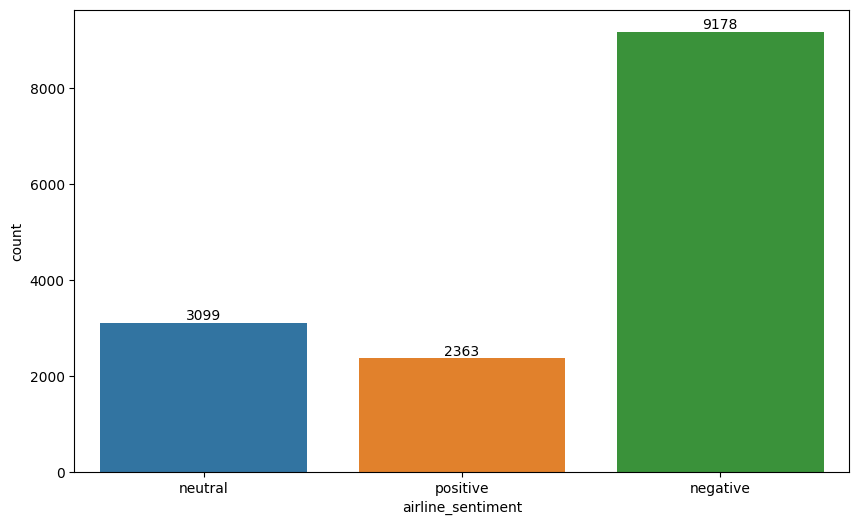

In [7]:
ax = sns.countplot(data=df, x="airline_sentiment")
ax.bar_label(ax.containers[0]);

## Cleaning Data

In [8]:
df2 = df.copy()

In [9]:
df2["text"].head(20)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7     @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! :-D
9     @VirginAmerica it was amazing, and arrived an ...
10    @VirginAmerica did you know that suicide is th...
11    @VirginAmerica I &lt;3 pretty graphics. so muc...
12    @VirginAmerica This is such a great deal! Alre...
13    @VirginAmerica @virginmedia I'm flying your #f...
14                               @VirginAmerica Thanks!
15        @VirginAmerica SFO-PDX schedule is still MIA.
16    @VirginAmerica So excited for my first cross c...
17    @VirginAmerica  I flew from NYC to SFO las

In [10]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()
s

# S+, boşluk hariç tüm karakterler en az bir kere olacak anlamındadır.
# S*, boşluk hariç tüm karakterler 0 veya daha fazla olacak anlamındadır.

'#lateflight @airlines'

In [11]:
s = re.sub("#\S+", "", s)
s

' @airlines'

In [12]:
s = re.sub("@\S+", "", s)
s.strip()

''

In [13]:
stop_words = stopwords.words("english")

for i in ["not", "no"]:
    stop_words.remove(i)

# Bu notebook'ta duygu analizi yapacağımız için stop_words' lerden not ve no' yu çıkardık.

In [14]:
def cleaning(data):
    
    import re
    
    # 1. Removing URL's
    data = re.sub("http\S+", "", data).strip()
    data = re.sub("www\S+", "", data).strip()
    
    # 2. removing Tags
    data = re.sub("#\S+", "", data).strip()
    
    # 3. Removing Mentions
    data = re.sub("@\S+", "", data).strip()
    
    # 4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    # 5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    # 6. Remove Puncs and Number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    # 7. removing stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    # 8. Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

In [15]:
cleaning_text = df2["text"].apply(cleaning)
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [16]:
df2 = df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df2["text"]
y = df2["airline_sentiment"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)
# Skor iyi çıkmazsa ilk akla gelecek şey, test datasında ignore edilen datalar mı var? olmalı...
# Ve test size'ı küçültüp daha çok data ile train yapmayı sağlayın...

## Vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# min_df = 3 --> Corpus'umda 3'den daha az yorumda geçen tokenleri ignore et.(genellikle 3-4-5 sayıları tercih edilir.)
# max_df = 1000 --> Corpus'umda 1000'den fazla yorumda geçen tokenleri ignore et.
    # Üst sınırları belirlemek her zaman riskli ve tehlikelidir.
    # max_df ve max_features' u kullanmanız önerilmez!
# max_features = 1500 --> Corpus'umda en sık kullanılan ilk 1500 feature(tokeni) dikkate al diğerlerini ignore et.
# ngram_range = (1,2) olursa tokenleri hem birer birer hem de ikişer ikişer kelime grupları halinde alır.
    # Tamlamaları yakalamak için kullanılır.
    # Best practice olarak tavsiye edilen (1,2)' de kalmak daha ileri geçmemektir.
    # Olumlu ve olumsuz kalıplar çoğunlukla 2 kelimeli isim ve sıfat tamlamalarından oluşur.

In [22]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,...,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [25]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

## Naive Bayes

https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2

In [26]:
# Naive Bayes genelde NLP'de iyi sonuç verdiği için NLP'de kullanılan bir ML algoritmasıdır.
# A olayının gerçekleşmesi durumunda B olayının gerçekleşmesi durumu' nun hesaplanması bu algoritmaya örnektir.

In [27]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# Normalde multiclass'da multinomial, binary'de bernoulli kullanılması önerilir.
# Ancak ikisini de kullanmayı ve en iyi score vereni tercih etmenizi öneriyoruz.

In [28]:
nb = MultinomialNB(alpha = 7)
nb.fit(X_train_count, y_train)

# "Harika TV kötü kargo" deseydik harika kelimesi yorumlarda hiç geçmediği için tüm olasılığı 0' a çekecekti.
# Bunu önlemek için alpha değeri kullanıyoruz.
# Pay'a alpha değeri eklerken paydaya 10 * olumlu yorum sayısı ekler. Böylece olasılığı 0'dan kurtarır.
# Overfitting problemini önlemek için alpha'yı kullanırız.
# Bu alpha değeri tüm tokenlere eklenir.

MultinomialNB(alpha=7)

In [29]:
print("NB Model")
eval(nb, X_train_count, X_test_count)

# Bizim için önemli olan negatif yorumları doğru tahmin etmek olduğu için negative class score'larını en iyielemeye çalışacam.
# Bu sebeple tüm değerlendirmelerimi de negative class üzerinden yapacağım.

NB Model
[[1777   38   20]
 [ 412  175   33]
 [ 216   22  235]]
Test_Set
              precision    recall  f1-score   support

    negative       0.74      0.97      0.84      1835
     neutral       0.74      0.28      0.41       620
    positive       0.82      0.50      0.62       473

    accuracy                           0.75      2928
   macro avg       0.77      0.58      0.62      2928
weighted avg       0.75      0.75      0.71      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      7343
     neutral       0.78      0.32      0.46      2479
    positive       0.84      0.52      0.64      1890

    accuracy                           0.76     11712
   macro avg       0.79      0.60      0.65     11712
weighted avg       0.77      0.76      0.73     11712



In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {"accuracy" : make_scorer(accuracy_score),
           "precision-neg" : make_scorer(precision_score, average=None, labels=["negative"]),
           "recall-neg" : make_scorer(recall_score, average=None, labels = ["negative"]),
           "f1-neg" : make_scorer(f1_score, average=None, labels=["negative"])}

model = MultinomialNB(alpha=7)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv = 10, return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy          0.732411
train_accuracy         0.757305
test_precision-neg     0.728242
train_precision-neg    0.743503
test_recall-neg        0.966225
train_recall-neg       0.974821
test_f1-neg            0.830506
train_f1-neg           0.843592
dtype: float64

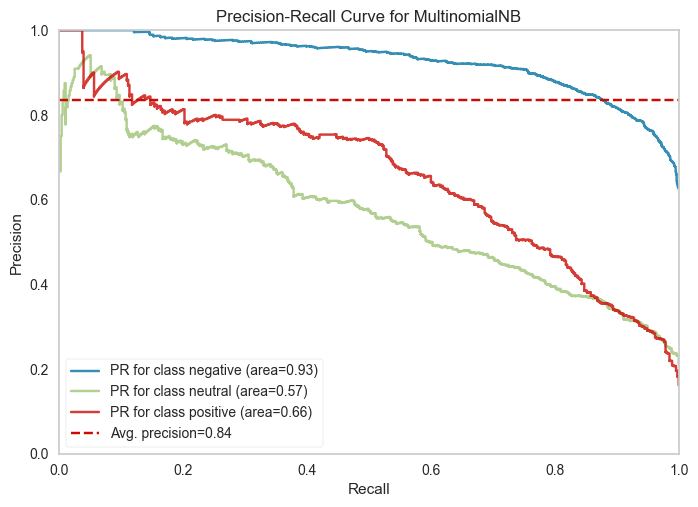

In [31]:
from yellowbrick.classifier import PrecisionRecallCurve
# Data imbalance olduğu için Precision-Recall Curve üzerinden yorumlama yapacağız.

viz = PrecisionRecallCurve(MultinomialNB(alpha=7),
                           classes = nb.classes_,
                           per_class = True)

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

# Modelimiz negative labelları diğer labellardan ayırma işini %93 başarı ile yapıyor.

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.05, max_iter=1000, class_weight="balanced")
log.fit(X_train_count, y_train)

# NLP'de GridSearch yapmak çok maaliyetli olduğu için manual olarak C değerine mğdahale ederek overfit durumunu çözüyoruz.
# Overfit varsa SVM ve Logistic Regression'da C değeri küçültülür.
    # Diğer modellerde C değeri arttıkça regularization artarken bu iki modelde C azaldıkça regularization artar.,

LogisticRegression(C=0.05, class_weight='balanced', max_iter=1000)

In [60]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1349  380  106]
 [  98  447   75]
 [  31   84  358]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.74      0.81      1835
     neutral       0.49      0.72      0.58       620
    positive       0.66      0.76      0.71       473

    accuracy                           0.74      2928
   macro avg       0.69      0.74      0.70      2928
weighted avg       0.78      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.76      0.84      7343
     neutral       0.55      0.80      0.65      2479
    positive       0.70      0.80      0.75      1890

    accuracy                           0.78     11712
   macro avg       0.73      0.79      0.75     11712
weighted avg       0.82      0.78      0.79     11712



In [63]:
model = LogisticRegression(C=0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring,
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Overfitting kontrolünü cross_validation sonrası test score'ları ile karşılaştırarark yapacağız.
# Küçük datalarda mean almadan önce tüm validation score'larını görün.
# Eğer score'larda çok fark varsa otalama değerde bir tutarsızlık olduğunu söyleyebiliriz.


test_accuracy          0.745646
train_accuracy         0.765113
test_precision-neg     0.747594
train_precision-neg    0.761561
test_recall-neg        0.963365
train_recall-neg       0.970584
test_f1-neg            0.841856
train_f1-neg           0.853460
dtype: float64

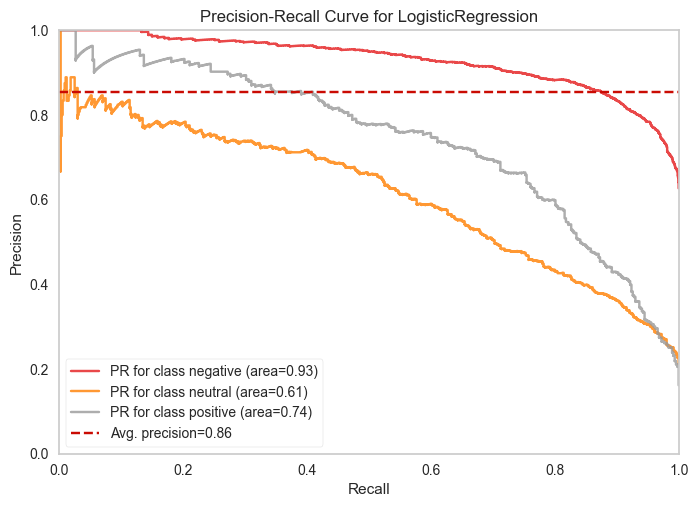

In [64]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.05, max_iter=1000),
                           classes = log.classes_,
                           per_class = True,
                           cmap = "Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [65]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, 
                                 labels=["negative"], 
                                 average=None)
log_AP_neg = viz.score_["negative"]

# Burada labels için tek bir label verdiğimiz için average'a ne yazdığımızın önemi yok. Bu yüzden None yazdık.
# Bizim hedefimiz negative olduğu için negative score'a baktık.

In [67]:
log = LogisticRegression(C = 0.02, max_iter = 1000, class_weight="balanced")
log.fit(X_train_count, y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [68]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1304  433   98]
 [  98  447   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.66      0.73      0.69       473

    accuracy                           0.72      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



## SVM

In [85]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 0.02)
svc.fit(X_train_count, y_train)

# Burada SVM modellerden LinearSVC' yi seçtik. SVC de seçilebilirdi.
# LinearSVC'nin hesaplama maliyeti daha düşük...

LinearSVC(C=0.02)

In [86]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1683  100   52]
 [ 250  320   50]
 [ 109   58  306]]
Test_Set
              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1835
     neutral       0.67      0.52      0.58       620
    positive       0.75      0.65      0.69       473

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.72      2928
weighted avg       0.78      0.79      0.78      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.95      0.90      7343
     neutral       0.77      0.62      0.69      2479
    positive       0.82      0.69      0.75      1890

    accuracy                           0.84     11712
   macro avg       0.82      0.75      0.78     11712
weighted avg       0.83      0.84      0.83     11712



In [87]:
model = LinearSVC(C = 0.02)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring,
                        cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Train ve test score'ları birbirine ne kadar yakınsa model o kadar iyi genelleme yapıyordur.


test_accuracy          0.787996
train_accuracy         0.839177
test_precision-neg     0.823268
train_precision-neg    0.858348
test_recall-neg        0.923190
train_recall-neg       0.953122
test_f1-neg            0.870334
train_f1-neg           0.903256
dtype: float64

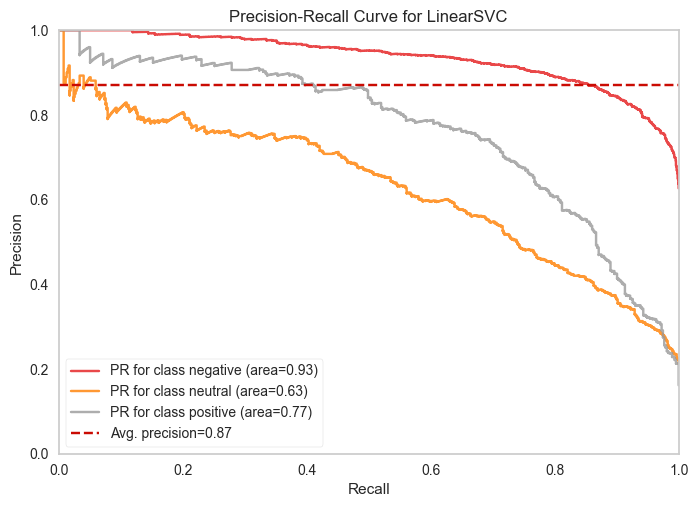

In [88]:
viz = PrecisionRecallCurve(LinearSVC(C = 0.02),
                           classes = svc.classes_,
                          per_class = True,
                          cmap = "Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [89]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"],
                                 average = None)
svc_AP_neg = viz.score_["negative"]

## KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count, y_train)

KNeighborsClassifier(n_neighbors=7)

In [98]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[916 834  85]
 [107 451  62]
 [ 51 169 253]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.50      0.63      1835
     neutral       0.31      0.73      0.43       620
    positive       0.63      0.53      0.58       473

    accuracy                           0.55      2928
   macro avg       0.60      0.59      0.55      2928
weighted avg       0.70      0.55      0.58      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.90      0.62      0.74      7343
     neutral       0.40      0.82      0.53      2479
    positive       0.70      0.56      0.62      1890

    accuracy                           0.65     11712
   macro avg       0.67      0.67      0.63     11712
weighted avg       0.76      0.65      0.68     11712



In [ ]:
model = KNeighborsClassifier(n_)

## Random Forest

## Ada Boost

## TF-IDF

## Model Comparisons  TF-IDF

## Naive Bayes

## Logistic Regression

## SVM

## KNN

## RandomForest

## Ada Boost

## Compare Scoring

## For New Tweets, prediction with pipeline


## Prediction

## WordCloud - Repetition of Words

## Collect Words

## Create Word Cloud